In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [51]:
data=pd.read_csv("mushrooms.csv")

In [52]:
data.shape

(8124, 23)

In [53]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [32]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
list(data.columns)

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [9]:
# data has only one type, which is the object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
for i in data.columns:
  print(i, data[i].unique())
# we have binary claasification. Either the mushroom is poisonous or edible

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [56]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


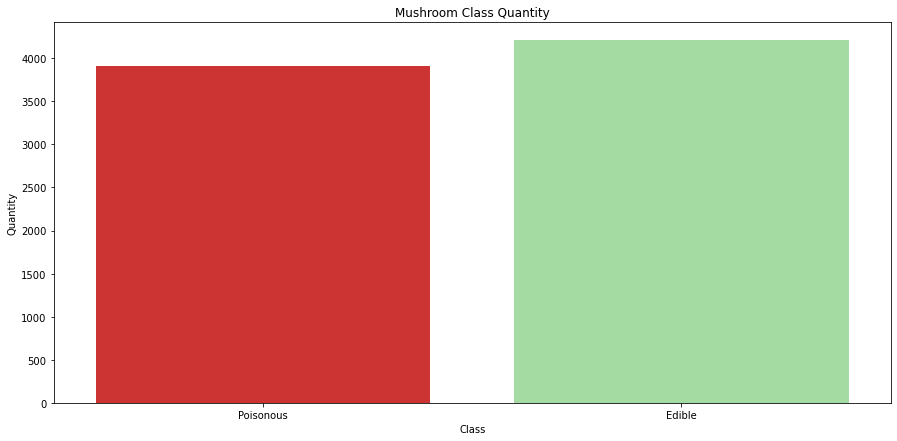

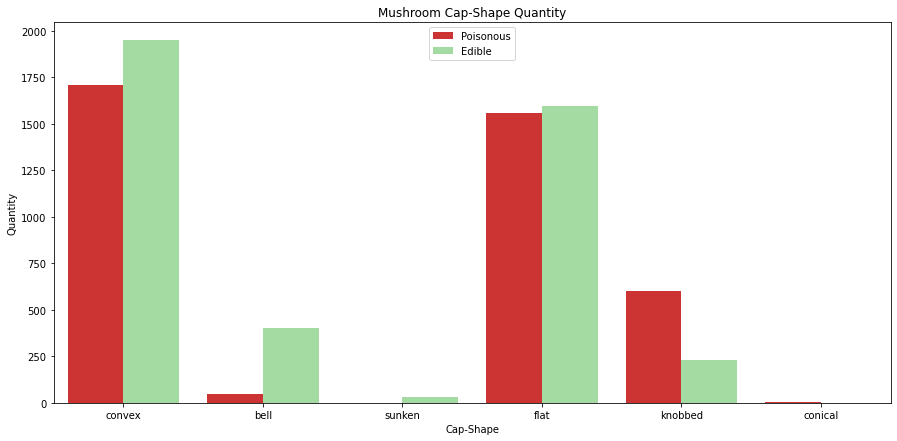

In [57]:
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


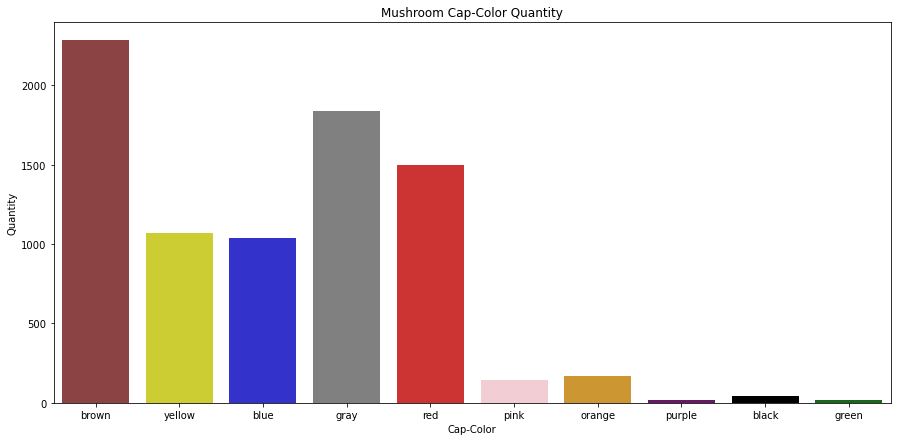

In [58]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


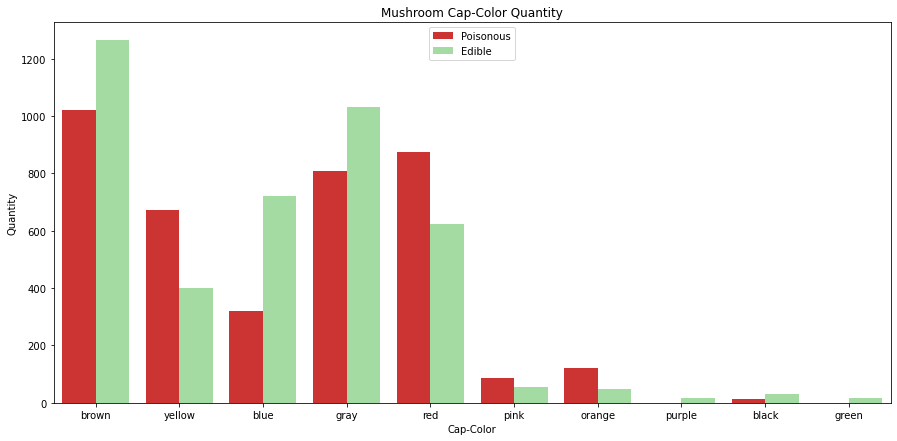

In [59]:
plot_col(col='cap-color', hue='class', labels=color_dict)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


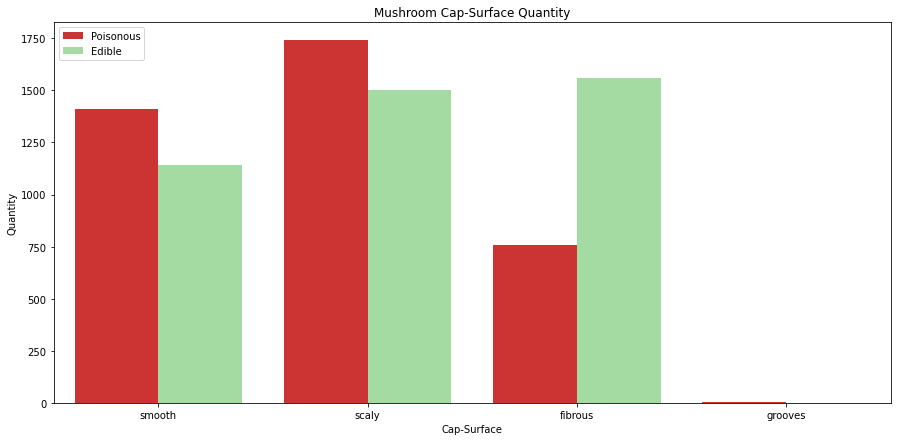

In [60]:
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
plot_col(col='cap-surface', hue='class', labels=surface_dict)

In [63]:
def get_labels(order, a_dict):    
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

In [64]:
pop_dict = {"abundant":"a","clustered":"c","numerous":"n","scattered":"s","several":"v","solitary":"y"}
hab_dict = {"grasses":"g","leaves":"l","meadows":"m","paths":"p","urban":"u","waste":"w","woods":"d"}

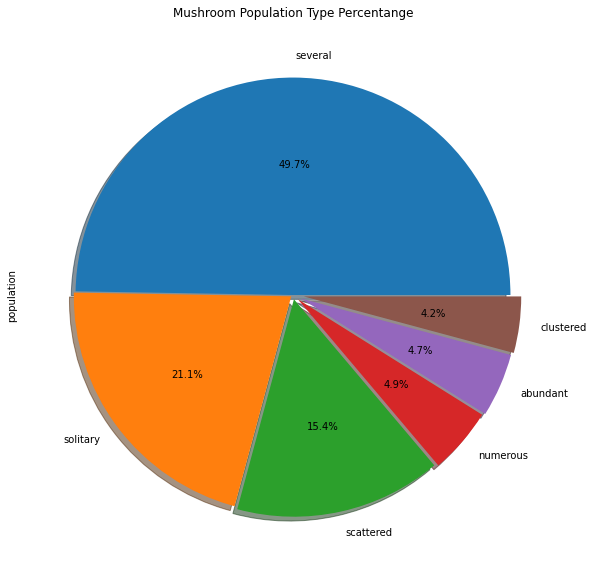

In [65]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(data['population'].value_counts().index)
pop_labels = get_labels(order, pop_dict)
explode = (0.0,0.01,0.02,0.03,0.04,0.05)
data['population'].value_counts().plot.pie(explode=explode , autopct='%1.1f%%', labels=pop_labels, shadow=True, ax=ax)
ax.set_title('Mushroom Population Type Percentange');

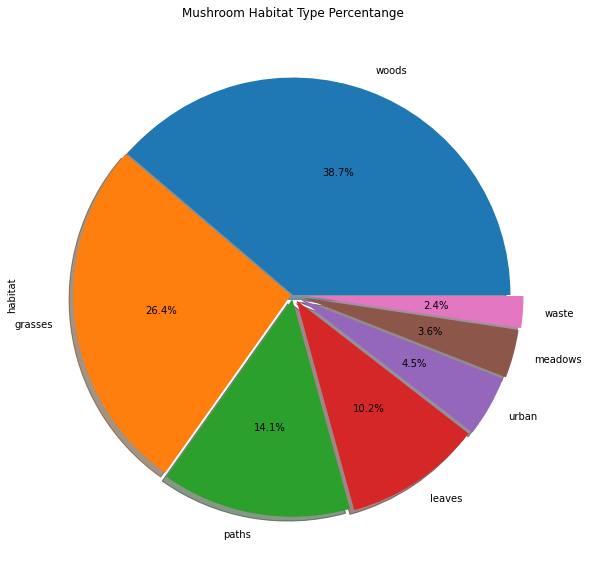

In [66]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(data['habitat'].value_counts().index)
hab_labels = get_labels(order, hab_dict)
explode = (0.0,0.01,0.02,0.03,0.04,0.05, 0.06)
data['habitat'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', labels=hab_labels, shadow=True, ax=ax)
ax.set_title('Mushroom Habitat Type Percentange');

In [11]:
from sklearn.preprocessing import LabelEncoder
object_1=LabelEncoder()
for i in data.columns:
    data[i] = object_1.fit_transform(data[i])

In [12]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [14]:
for i in data.columns:
  print(i, data[i].unique())

class [1 0]
cap-shape [5 0 4 2 3 1]
cap-surface [2 3 0 1]
cap-color [4 9 8 3 2 5 0 7 1 6]
bruises [1 0]
odor [6 0 3 5 2 1 8 7 4]
gill-attachment [1 0]
gill-spacing [0 1]
gill-size [1 0]
gill-color [ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape [0 1]
stalk-root [3 2 1 4 0]
stalk-surface-above-ring [2 0 1 3]
stalk-surface-below-ring [2 0 3 1]
stalk-color-above-ring [7 3 6 4 0 2 5 1 8]
stalk-color-below-ring [7 6 3 0 4 2 8 5 1]
veil-type [0]
veil-color [2 0 1 3]
ring-number [1 2 0]
ring-type [4 0 2 1 3]
spore-print-color [2 3 6 1 7 5 4 8 0]
population [3 2 0 4 5 1]
habitat [5 1 3 0 4 6 2]


In [33]:
print(data.groupby('class').size())

class
0    4208
1    3916
dtype: int64


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

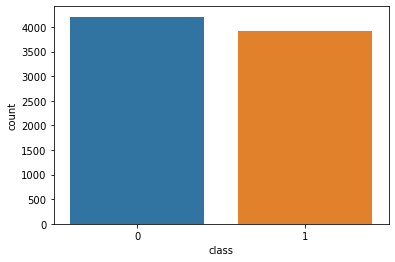

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data["class"])


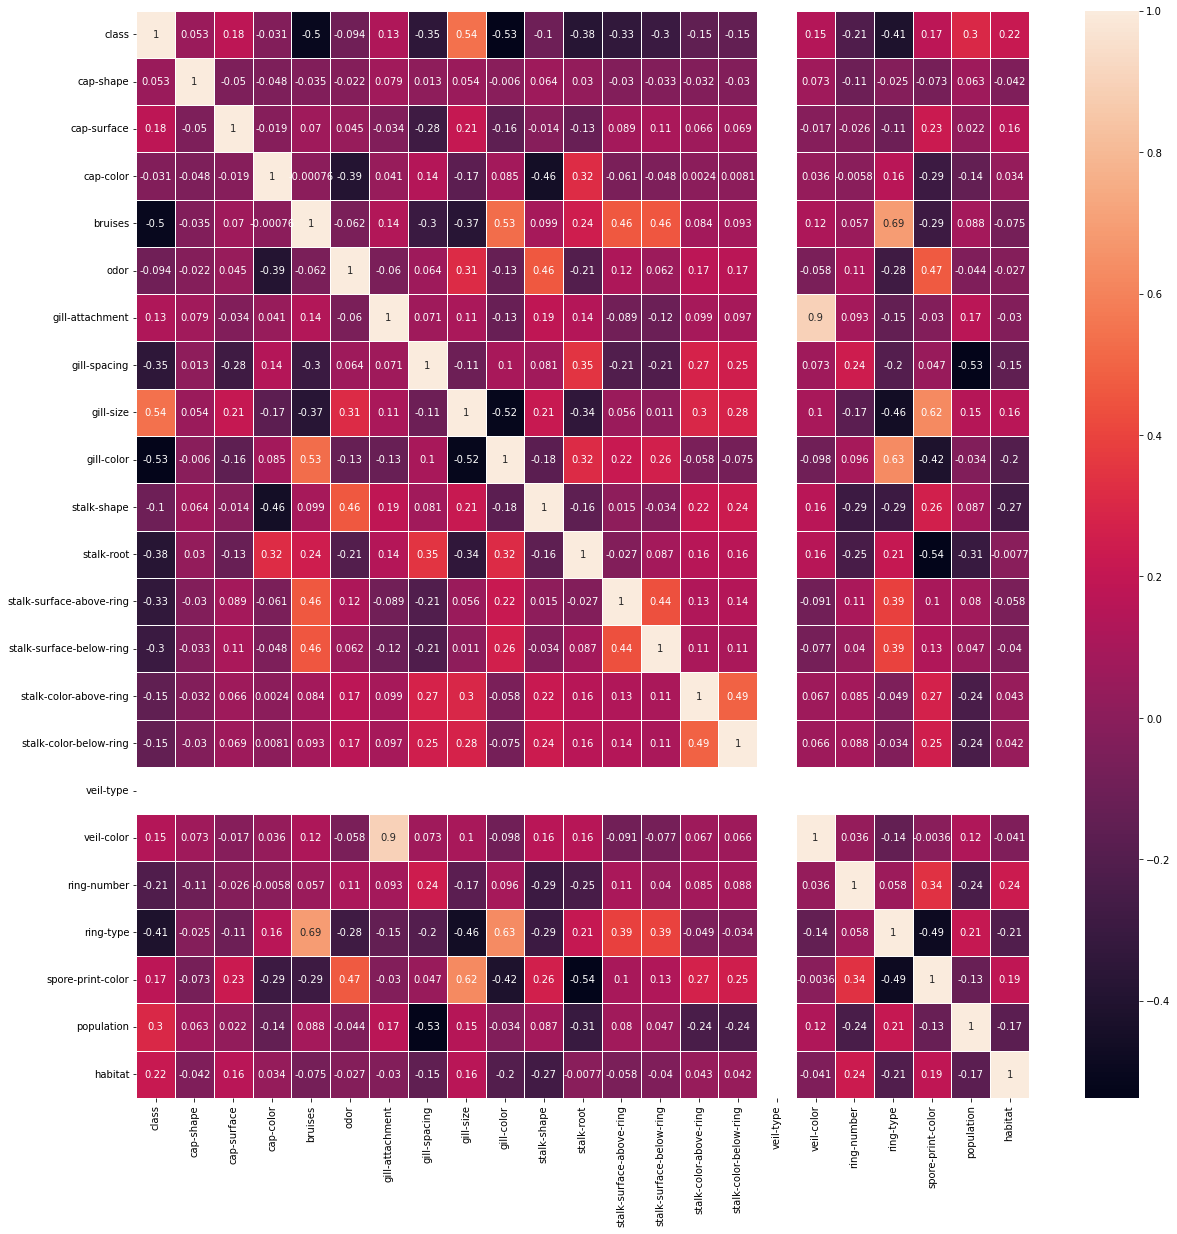

In [26]:
# heat map.
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [27]:
# Here we have deleted one of the columns that has no connection with the rest of the data.
data.drop(['veil-type'], axis=1, inplace=True)

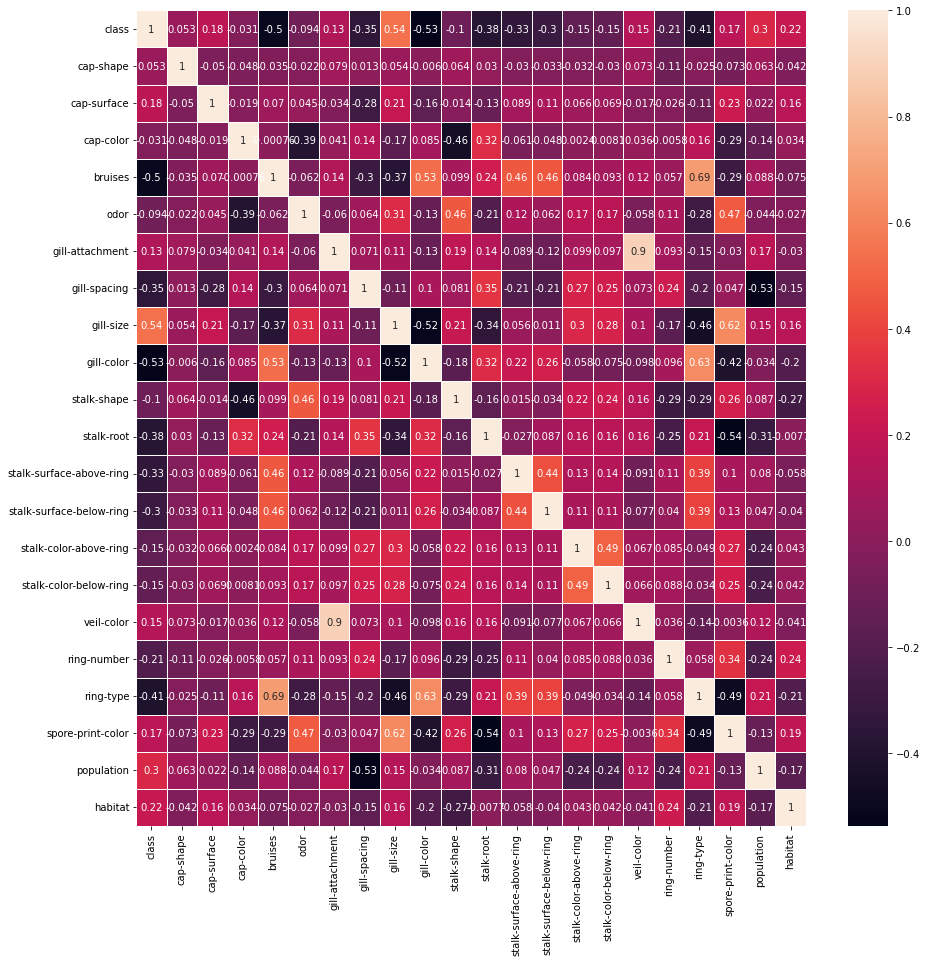

In [28]:
# Now we will draw a heat map.
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [29]:
target= data["class"].values
feature= data.drop(["class"],axis=1)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature,target, test_size=0.2, random_state=11)

In [31]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6499, 21) (1625, 21) (6499,) (1625,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [46]:
lr = LogisticRegression(solver="newton-cg")
lr.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))


Test Accuracy: 93.85%


In [50]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score=0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%
